# COVID-19 Global Data Analysis and Reporting

This notebook analyzes global COVID-19 trends focusing on cases, deaths, and vaccination progress for selected countries. It loads the Our World in Data COVID-19 dataset, cleans the data, explores key metrics, and visualizes trends with insightful commentary.

## 1. Data Loading & Exploration

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="darkgrid")

# Load dataset
df = pd.read_csv('owid-covid-data.csv')

# Preview dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


### Dataset columns overview

In [12]:
# Show columns
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

### Check missing values in key columns

In [13]:
key_cols = ['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
df[key_cols].isnull().sum()

date                       0
location                   0
total_cases             3033
total_deaths           20875
new_cases               3193
new_deaths             20839
total_vaccinations    121132
dtype: int64

## 2. Data Cleaning

In [14]:
# Filter countries of interest
countries = ['Kenya', 'United States', 'India', 'Brazil', 'South Africa']
df_countries = df[df['location'].isin(countries)].copy()

# Drop rows with missing dates or critical values
df_countries = df_countries.dropna(subset=['date'])

# Convert date to datetime
df_countries['date'] = pd.to_datetime(df_countries['date'])

# Fill missing numeric values with 0 for cumulative columns and interpolate daily new cases/deaths
df_countries['total_cases'] = df_countries['total_cases'].ffill().fillna(0)
df_countries['total_deaths'] = df_countries['total_deaths'].ffill().fillna(0)
df_countries['new_cases'] = df_countries['new_cases'].interpolate().fillna(0)
df_countries['new_deaths'] = df_countries['new_deaths'].interpolate().fillna(0)
df_countries['total_vaccinations'] = df_countries['total_vaccinations'].ffill().fillna(0)

## 3. Exploratory Data Analysis (EDA)

### Total Cases Over Time

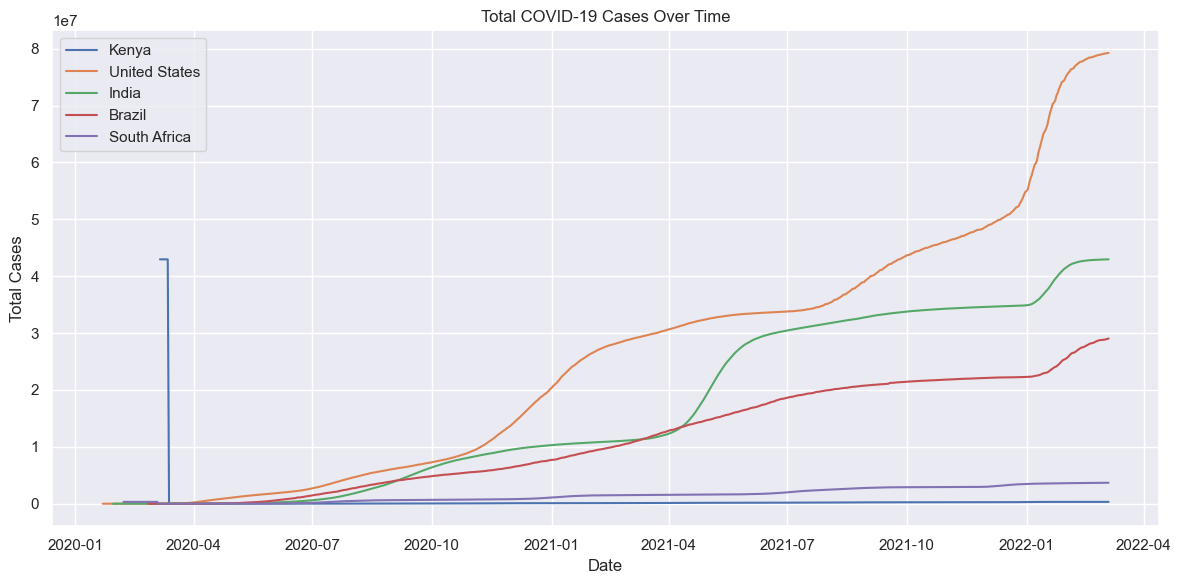

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

### Total Deaths Over Time

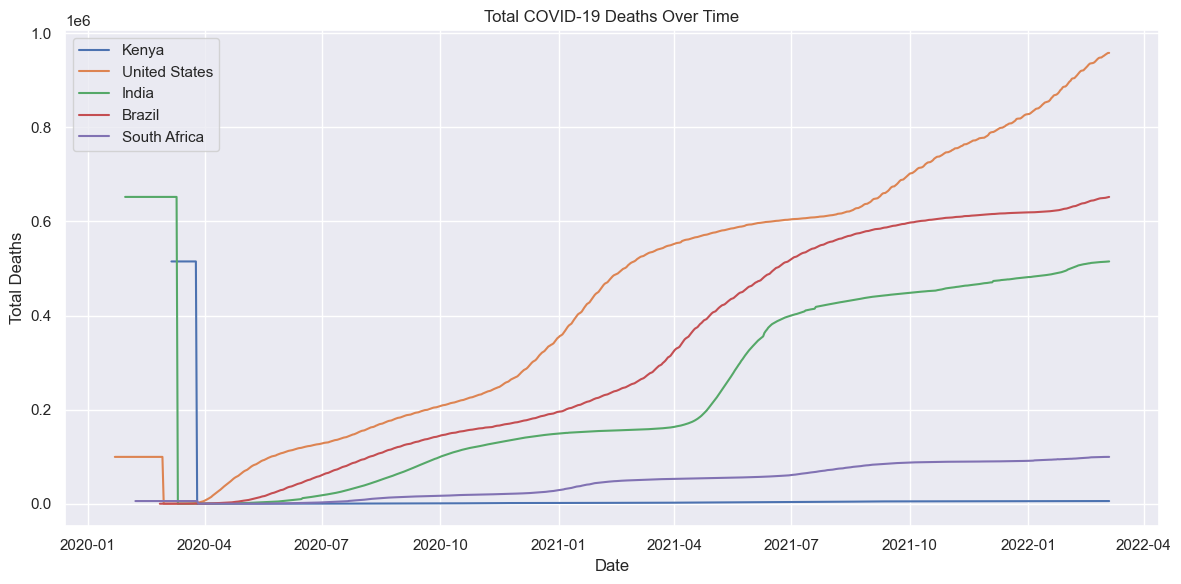

In [16]:
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()

### New Cases Comparison

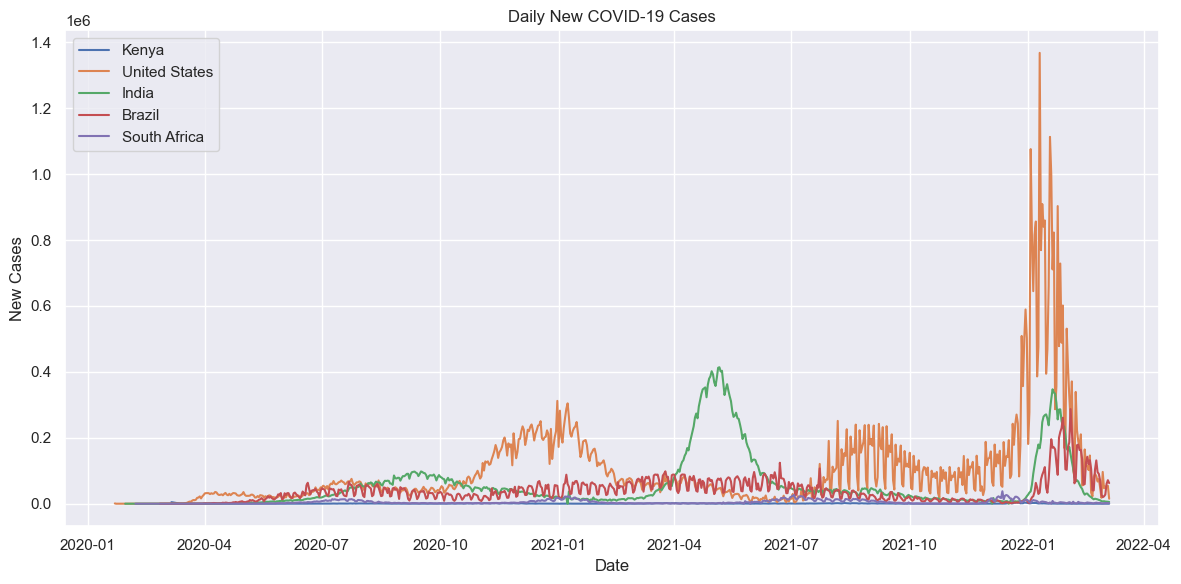

In [17]:
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()

### Death Rate (Total Deaths / Total Cases)

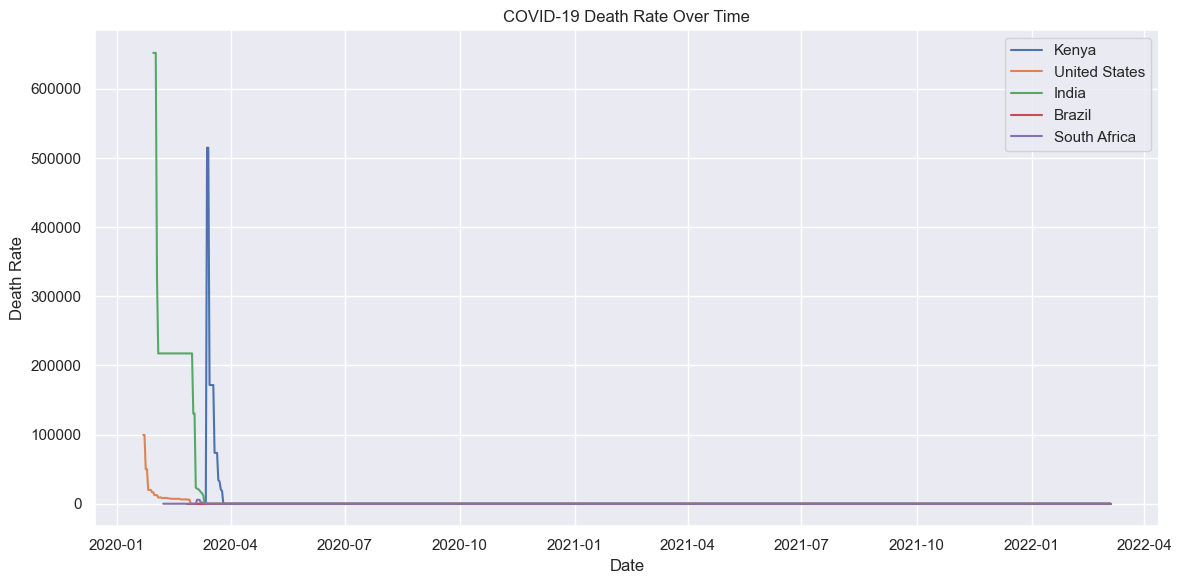

In [18]:
# Avoid division by zero
df_countries['death_rate'] = df_countries.apply(lambda row: (row['total_deaths'] / row['total_cases']) if row['total_cases'] > 0 else 0, axis=1)

plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['death_rate'], label=country)
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()

## 4. Vaccination Progress

### Cumulative Vaccinations Over Time

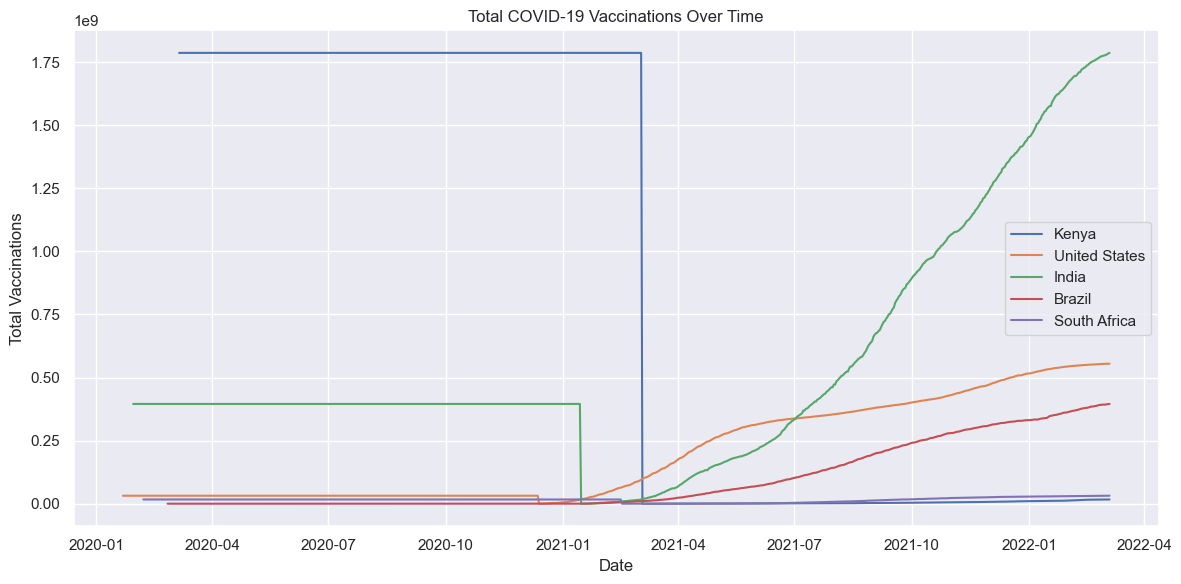

In [19]:
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)
plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()

## 5. Key Insights

### Insight 1
- The United States shows high total COVID-19 cases and deaths, but also a strong vaccination rollout.

### Insight 2
- India and Brazil experienced sharp increases in daily new cases during waves, impacting global trends.

### Insight 3
- Kenya and South Africa have lower total cases and deaths but show steady vaccination progress.

### Insight 4
- Death rate varies significantly across countries, with some countries showing decreases over time, indicating improved treatment.

### Insight 5
- Vaccination rollouts correlate with slowing growth in new cases in some countries, highlighting effectiveness.

## Conclusion

This analysis highlights global disparities in COVID-19 impact and vaccination progress. Continued data monitoring and vaccination efforts remain critical in controlling the pandemic. This notebook serves as a foundation for further analysis and reporting.